# Data Analysis of Used Automobiles

## Summary 

Our inspiration was how the biggest perk of buying a secondhand car is that you let the first owner handle the vehicle's highest deprecation. A brand new car loses its value the most in the first 2 or 3 years of use. Anyone can get a lot more for their money if they have the right information at their disposal!.
People with low financial standing would be willing to buy the used cars. They would be able to articulate the reasonable price.

The recent surge in fuel prices also motivated people to switch to electric cars. Using this analysis, I would suggest to people what cars do not value which cars can be decommissioned.

This analysis helps us in selling used automobiles at a fair price based upon on the previous data and allows us to understand the relationship between the price and remaining features and many hidden insights within the data


## Data Acquisition

This dataset is obtained from kaggle Automobile Dataset <a href="https://www.kaggle.com/toramky/automobile-dataset">HERE</a>

This dataset consist of data From 1985 Ward's Automotive Yearbook. Here are the sources

Sources:

1985 Model Import Car and Truck Specifications, 1985 Ward's Automotive Yearbook.
Personal Auto Manuals, Insurance Services Office, 160 Water Street, New York, NY 10038
Insurance Collision Report, Insurance Institute for Highway Safety, Watergate 600, Washington, DC 20037

Content
This data set consists of three types of entities: (a) the specification of an auto in terms of various characteristics, (b) its assigned insurance risk rating, (c) its normalized losses in use as compared to other cars. The second rating corresponds to the degree to which the auto is more risky than its price indicates. Cars are initially assigned a risk factor symbol associated with its price. Then, if it is more risky (or less), this symbol is adjusted by moving it up (or down) the scale. Actuarians call this process "symboling". A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.

The third factor is the relative average loss payment per insured vehicle year. This value is normalized for all autos within a particular size classification (two-door small, station wagons, sports/speciality, etc…), and represents the average loss per car per year.

Note: Several of the attributes in the database could be used as a "class" attribute.

In [86]:
#importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import sklearn
from scipy import stats
%matplotlib inline

## Read data

In [32]:
#Reading the file using pandas
df = pd.read_csv('Automobile_data.csv')

In [33]:
#shape of the dataframe
df.shape

(205, 26)

In [34]:
#top 5 rows of the dataframe
print("The first 5 rows of the dataframe") 
df.head()

The first 5 rows of the dataframe


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [35]:
#printing all column names
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

we can drop missing values along the column "price" as it is our target variable and any missing data cannot be useful

In [36]:
df.dropna(subset=['price'],axis=0)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


<h1 id="basic_insight">Basic Insight of Dataset</h1>
<p>
After reading data into Pandas dataframe, it is time for us to explore the dataset.<br>
There are several ways to obtain essential insights of the data to help us better understand our dataset.
</p>

<h2>Data Types</h2>
<p>
Data has a variety of types.<br>
The main types stored in Pandas dataframes are <b>object</b>, <b>float</b>, <b>int</b>, <b>bool</b> and <b>datetime64</b>. In order to better learn about each attribute, it is always good for us to know the data type of each column.
</p>

In [37]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

<h2>Describe</h2>
If we would like to get a statistical summary of each column, such as count, column mean value, column standard deviation, etc. We use the describe method:

In [38]:
df.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


<p>
This shows the statistical summary of all numeric-typed (int, float) columns.<br>
For example, the attribute "symboling" has 205 counts, the mean value of this column is 0.83, the standard deviation is 1.25, the minimum value is -2, 25th percentile is 0, 50th percentile is 1, 75th percentile is 2, and the maximum value is 3.
<br>

In [39]:
df[['length', 'compression-ratio']].describe()

,length,compression-ratio
count,205.000000,205.000000
mean,174.049268,10.142537
std,12.337289,3.972040
min,141.100000,7.000000
25%,166.300000,8.600000
50%,173.200000,9.000000
75%,183.100000,9.400000
max,208.100000,23.000000


# Data Preprocessing 
<h2 id="identifying_handling_missing_values">Identifying and handling missing values</h2>

In the car dataset, missing data came with the question mark "?".
We replace "?" with NaN (Not a Number) using pandas and numpy libraries

In [40]:
# replace "?" to NaN
df.replace("?", np.nan, inplace = True)
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


#### Evaluating for missing data

In [41]:
df.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

This gives total number of null values in each individual column


Based on the summary above, each column has 205 rows of data, seven columns containing missing data:
<ol>
    <li>"normalized-losses": 41 missing data</li>
    <li>"num-of-doors": 2 missing data</li>
    <li>"bore": 4 missing data</li>
    <li>"stroke" : 4 missing data</li>
    <li>"horsepower": 2 missing data</li>
    <li>"peak-rpm": 2 missing data</li>
    <li>"price": 4 missing data</li>
</ol>

### Dealing with missing data

We can deal with missing data in many ways
<ol>
    <li>drop data<br>
        a. drop the whole row<br>
        b. drop the whole column
    </li>
    <li>replace data<br>
        a. replace it by mean<br>
        b. replace it by frequency<br>
        c. replace it based on other functions
    </li>
</ol>

Whole columns should be dropped only if most entries in the column are empty. In our dataset, none of the columns are empty enough to drop entirely.
We have some freedom in choosing which method to replace data; however, some methods may seem more reasonable than others.

Replacing missing values by mean 

In [42]:
#replacing the missing 'normalized-losses' values by the mean of the column
avg_norm_loss = df["normalized-losses"].astype("float").mean(axis=0)
df["normalized-losses"].replace(np.nan, avg_norm_loss, inplace=True)

#replacing the missing 'bore' values by the mean of the column
avg_bore=df['bore'].astype('float').mean(axis=0)
df["bore"].replace(np.nan, avg_bore, inplace=True)

#replacing the missing 'stroke' values by the mean of the column
strokemean=df["stroke"].astype('float').mean(axis=0)
df["stroke"].replace(np.nan,strokemean,inplace=True)

#replacing the missing 'horsepower' values by the mean of the column
avg_horsepower = df['horsepower'].astype('float').mean(axis=0)
df['horsepower'].replace(np.nan, avg_horsepower, inplace=True)

#replacing the missing 'peak-rpm' values by the mean of the column
avg_peakrpm=df['peak-rpm'].astype('float').mean(axis=0)
df['peak-rpm'].replace(np.nan, avg_peakrpm, inplace=True)

Replacing mean values by mode

In [43]:
#replace the missing 'num-of-doors' values by the most frequent 
df["num-of-doors"].replace(np.nan, df['num-of-doors'].value_counts().idxmax(), inplace=True)

Dropping whole rows which has missing 'price' values

In [44]:
# simply dropping whole row with NaN in "price" column
df.dropna(subset=["price"], axis=0, inplace=True)

# reset index, because we droped two rows
df.reset_index(drop=True, inplace=True)

In [45]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


### Converting data types to proper format

In [46]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

<p>As we can see above, some columns are not of the correct data type. Numerical variables should have type 'float' or 'int', and variables with strings such as categories should have type 'object'. For example, 'bore' and 'stroke' variables are numerical values that describe the engines, so we should expect them to be of the type 'float' or 'int'; however, they are shown as type 'object'.</p> 

In [47]:
df[["bore", "stroke"]] = df[["bore", "stroke"]].astype("float")
df[["normalized-losses"]] = df[["normalized-losses"]].astype("int")
df[["price"]] = df[["price"]].astype("float")
df[["peak-rpm"]] = df[["peak-rpm"]].astype("float")

### Data Transformation


Data Standardizatiom

In [48]:
# Convert mpg to L/100km by mathematical operation (235 divided by mpg)
df['city-L/100km'] = 235/df["city-mpg"]

# transform mpg to L/100km by mathematical operation (235 divided by mpg)
df["highway-mpg"] = 235/df["highway-mpg"]

# rename column name from "highway-mpg" to "highway-L/100km"
df.rename(columns={'"highway-mpg"':'highway-L/100km'}, inplace=True)

Data Normalisation

In [49]:
# replace (original value) by (original value)/(maximum value)
df['length'] = df['length']/df['length'].max()
df['width'] = df['width']/df['width'].max()
df['height'] = df['height']/df['height'].max() 

# Analysis and Visualization

### Binning

Binning is a process of transforming continuous numerical variables into discrete categorical 'bins', for grouped analysis.

histogram of horspower, to see what the distribution of horsepower looks like.

Text(0.5, 1.0, 'horsepower bins')

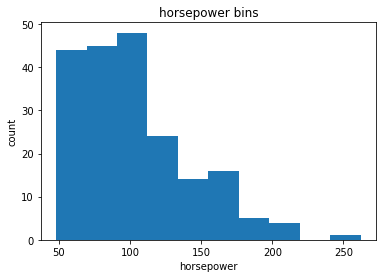

In [50]:
df["horsepower"]=df["horsepower"].astype(int, copy=True)

plt.hist(df["horsepower"])

# set x/y labels and plot title
plt.xlabel("horsepower")
plt.ylabel("count")
plt.title("horsepower bins")

In [51]:
bins = np.linspace(min(df["horsepower"]), max(df["horsepower"]), 4)
group_names = ['Low', 'Medium', 'High']
df['horsepower-binned'] = pd.cut(df['horsepower'], bins, labels=group_names, include_lowest=True )
df[['horsepower','horsepower-binned']].head()

,horsepower,horsepower-binned
0,111,Low
1,111,Low
2,154,Medium
3,102,Low
4,115,Low


In [52]:
#number of vehicles in each bin
df["horsepower-binned"].value_counts()

Low       153
Medium     43
High        5
Name: horsepower-binned, dtype: int64

Text(0.5, 1.0, 'horsepower bins')

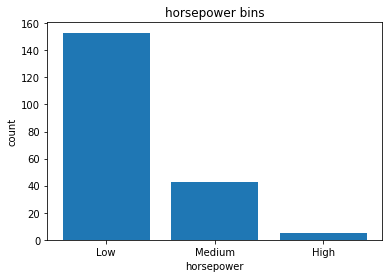

In [53]:
#bar plot
plt.bar(group_names, df["horsepower-binned"].value_counts())

# set x/y labels and plot title
plt.xlabel("horsepower")
plt.ylabel("count")
plt.title("horsepower bins")

#### Bins Visualization

Text(0.5, 1.0, 'horsepower bins')

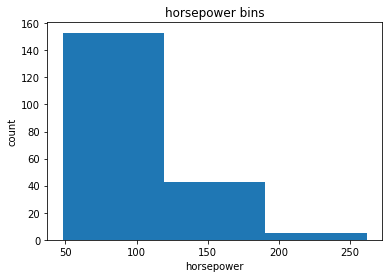

In [54]:
# historgram of attribute "horsepower" with bins = 3
plt.hist(df["horsepower"], bins = 3)

# x/y labels and plot title
plt.xlabel("horsepower")
plt.ylabel("count")
plt.title("horsepower bins")

### One Hot Encoding

In [55]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price', 'city-L/100km', 'horsepower-binned'],
      dtype='object')

In [56]:
dummy_variable_1 = pd.get_dummies(df["fuel-type"])
dummy_variable_1.rename(columns={'fuel-type-diesel':'gas', 'fuel-type-diesel':'diesel'}, inplace=True)

# merging data frame "df" and "dummy_variable_1" 
df = pd.concat([df, dummy_variable_1], axis=1)

# dropping original column "fuel-type" from "df"
df.drop("fuel-type", axis = 1, inplace=True)

dummy_variable_2 = pd.get_dummies(df['aspiration'])
dummy_variable_2.rename(columns={'std':'aspiration-std', 'turbo': 'aspiration-turbo'}, inplace=True)

# indicator variables of aspiration and assigning it to data frame "dummy_variable_2"
dummy_variable_2 = pd.get_dummies(df['aspiration'])

# changing column names for clarity
dummy_variable_2.rename(columns={'std':'aspiration-std', 'turbo': 'aspiration-turbo'}, inplace=True)

#merging the new dataframe to the original datafram
df = pd.concat([df, dummy_variable_2], axis=1)

# dropping original column "aspiration" from "df"
df.drop('aspiration', axis = 1, inplace=True)

df.head()

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas,aspiration-std,aspiration-turbo
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,5000.0,21,8.703704,13495.0,11.190476,Low,0,1,1,0
1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,5000.0,21,8.703704,16500.0,11.190476,Low,0,1,1,0
2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,...,5000.0,19,9.038462,16500.0,12.368421,Medium,0,1,1,0
3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,...,5500.0,24,7.833333,13950.0,9.791667,Low,0,1,1,0
4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,...,5500.0,18,10.681818,17450.0,13.055556,Low,0,1,1,0


##  Analyzing Individual Feature Patterns using Visualization

Understanding the type of variable for correct visualization method

In [57]:
df.dtypes

symboling               int64
normalized-losses       int32
make                   object
num-of-doors           object
body-style             object
drive-wheels           object
engine-location        object
wheel-base            float64
length                float64
width                 float64
height                float64
curb-weight             int64
engine-type            object
num-of-cylinders       object
engine-size             int64
fuel-system            object
bore                  float64
stroke                float64
compression-ratio     float64
horsepower              int32
peak-rpm              float64
city-mpg                int64
highway-mpg           float64
price                 float64
city-L/100km          float64
horsepower-binned    category
diesel                  uint8
gas                     uint8
aspiration-std          uint8
aspiration-turbo        uint8
dtype: object

In [59]:
#Computing pairwise correlation of columns.
df.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas,aspiration-std,aspiration-turbo
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008153,...,0.075810,0.279740,-0.035527,-0.029807,-0.082391,0.066171,-0.196735,0.196735,0.054615,-0.054615
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055045,...,0.217300,0.239543,-0.225016,0.181189,0.133999,0.238567,-0.101546,0.101546,0.006911,-0.006911
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158018,...,0.371178,-0.360305,-0.470606,0.577576,0.584642,0.476153,0.307237,-0.307237,-0.256889,0.256889
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.123952,...,0.579795,-0.285970,-0.665192,0.707108,0.690628,0.657373,0.211187,-0.211187,-0.230085,0.230085
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188822,...,0.615056,-0.245800,-0.633531,0.736728,0.751265,0.673363,0.244356,-0.244356,-0.305732,0.305732
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.060663,...,-0.087001,-0.309974,-0.049800,0.084301,0.135486,0.003811,0.281578,-0.281578,-0.090336,0.090336
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167438,...,0.757981,-0.279361,-0.749543,0.836921,0.834415,0.785353,0.221046,-0.221046,-0.321955,0.321955
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.205928,...,0.822668,-0.256733,-0.650546,0.783465,0.872335,0.745059,0.070779,-0.070779,-0.110040,0.110040
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,...,0.566903,-0.267392,-0.582027,0.559112,0.543155,0.554610,0.054458,-0.054458,-0.227816,0.227816
stroke,-0.008153,0.055045,0.158018,0.123952,0.188822,-0.060663,0.167438,0.205928,-0.055390,1.000000,...,0.098128,-0.063561,-0.033956,0.047089,0.082269,0.036133,0.241064,-0.241064,-0.218233,0.218233


Our target variable is the price of the automobile. Plotting scatter plot between various features and price for extent of linear relationship.

engine-size is a potential predictor variable of price 

(0.0, 53481.870930825266)

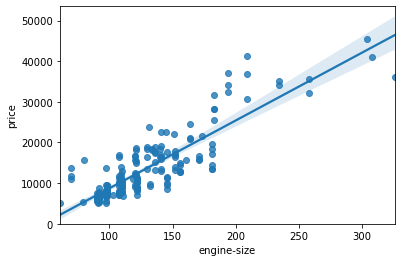

In [60]:
# Engine size as potential predictor variable of price
sns.regplot(x="engine-size", y="price", data=df)
plt.ylim(0,)

In [61]:
df[["engine-size", "price"]].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


Highway mpg is a potential predictor variable of price 

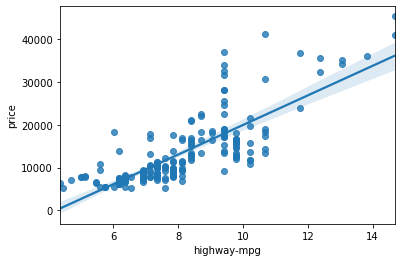

In [62]:
sns.regplot(x="highway-mpg", y="price", data=df)

In [63]:
df[['highway-mpg', 'price']].corr()

,highway-mpg,price
highway-mpg,1.000000,0.801118
price,0.801118,1.000000


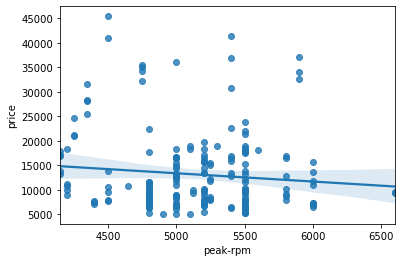

In [64]:
sns.regplot(x="peak-rpm", y="price", data=df)

<p>Peak rpm does not seem like a good predictor of the price at all since the regression line is close to horizontal. Also, the data points are very scattered and far from the fitted line, showing lots of variability. Therefore it's it is not a reliable variable.</p>

In [65]:
df[['peak-rpm','price']].corr()

,peak-rpm,price
peak-rpm,1.000000,-0.101616
price,-0.101616,1.000000


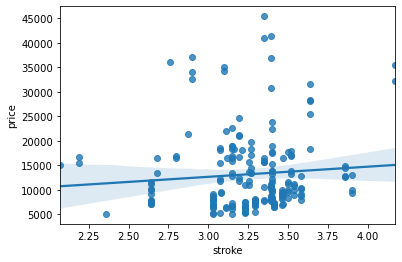

In [66]:
sns.regplot(y="price",x="stroke",data=df)

There is a weak correlation between the variable 'stroke' and 'price.' as such regression will not work well.

In [67]:
df[["price","stroke"]].corr()

,price,stroke
price,1.000000,0.082269
stroke,0.082269,1.000000


## Categorical variables

Relationship between 'body-style' and 'price'

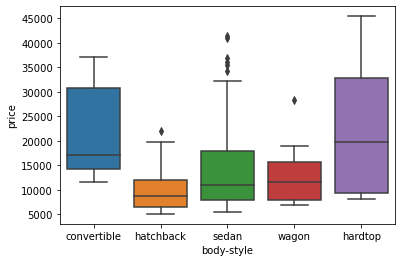

In [68]:
sns.boxplot(x="body-style", y="price", data=df)

We see that the distributions of price between the different body-style categories have a significant overlap, and so body-style would not be a good predictor of price

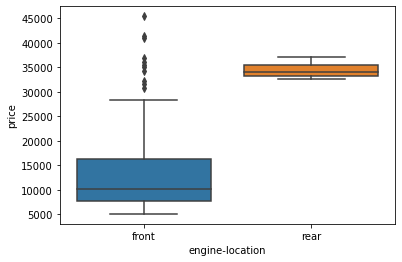

In [69]:
sns.boxplot(x="engine-location", y="price", data=df)

Here we see that the distribution of price between these two engine-location categories, front and rear, are distinct enough to take engine-location as a potential good predictor of price.

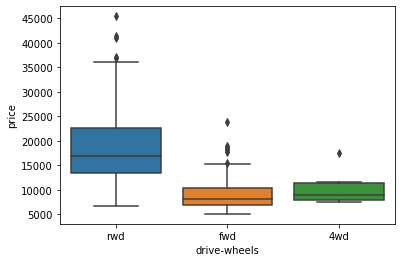

In [70]:
sns.boxplot(x="drive-wheels", y="price", data=df)

Here we see that the distribution of price between the different drive-wheels categories differs; as such drive-wheels could potentially be a predictor of price.

## Descriptive Statistical Analysis

In [71]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas,aspiration-std,aspiration-turbo
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,...,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,0.899108,2555.666667,126.875622,3.330692,3.256874,...,103.402985,5117.665368,25.179104,8.044957,13207.129353,9.944145,0.099502,0.900498,0.820896,0.179104
std,1.254802,31.99625,6.066366,0.059213,0.029187,0.040933,517.296727,41.546834,0.268072,0.316048,...,37.365650,478.113805,6.423220,1.840739,7947.066342,2.534599,0.300083,0.300083,0.384397,0.384397
min,-2.000000,65.00000,86.600000,0.678039,0.837500,0.799331,1488.000000,61.000000,2.540000,2.070000,...,48.000000,4150.000000,13.000000,4.351852,5118.000000,4.795918,0.000000,0.000000,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,0.869565,2169.000000,98.000000,3.150000,3.110000,...,70.000000,4800.000000,19.000000,6.911765,7775.000000,7.833333,0.000000,1.000000,1.000000,0.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,0.904682,2414.000000,120.000000,3.310000,3.290000,...,95.000000,5125.369458,24.000000,7.833333,10295.000000,9.791667,0.000000,1.000000,1.000000,0.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,0.928094,2926.000000,141.000000,3.580000,3.410000,...,116.000000,5500.000000,30.000000,9.400000,16500.000000,12.368421,0.000000,1.000000,1.000000,0.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,1.000000,4066.000000,326.000000,3.940000,4.170000,...,262.000000,6600.000000,49.000000,14.687500,45400.000000,18.076923,1.000000,1.000000,1.000000,1.000000


In [72]:
df.describe(include=['object'])

,make,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
count,201,201,201,201,201,201,201,201
unique,22,2,5,3,2,6,7,8
top,toyota,four,sedan,fwd,front,ohc,four,mpfi
freq,32,115,94,118,198,145,157,92


Value Counts

In [74]:
drive_wheels_counts = df['drive-wheels'].value_counts().to_frame()
drive_wheels_counts.rename(columns={'drive-wheels': 'value_counts'}, inplace=True)
drive_wheels_counts.index.name = 'drive-wheels'
drive_wheels_counts

,value_counts
drive-wheels,
fwd,118
rwd,75
4wd,8


In [75]:
# engine-location as variable
engine_loc_counts = df['engine-location'].value_counts().to_frame()
engine_loc_counts.rename(columns={'engine-location': 'value_counts'}, inplace=True)
engine_loc_counts.index.name = 'engine-location'
engine_loc_counts

,value_counts
engine-location,
front,198
rear,3


Examining the value counts of the engine location would not be a good predictor variable for the price. This is because we only have three cars with a rear engine and 198 with an engine in the front, this result is skewed. Thus, we are not able to draw any conclusions about the engine location.

## Grouping

In [76]:
df['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [77]:
df_group_one = df[['drive-wheels','body-style','price']]
# grouping results
df_group_one = df_group_one.groupby(['drive-wheels'],as_index=False).mean()
df_group_one

,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


From our data, it seems rear-wheel drive vehicles are, on average, the most expensive, while 4-wheel and front-wheel are approximately the same in price.

In [80]:
df_gptest = df[['drive-wheels','body-style','price']]
grouped_test1 = df_gptest.groupby(['drive-wheels','body-style'],as_index=False).mean()
grouped_pivot = grouped_test1.pivot(index='drive-wheels',columns='body-style')
grouped_pivot = grouped_pivot.fillna(0) #fill missing values with 0
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [81]:
df_g1=df[["body-style","price"]]
df_g2=df_g1.groupby(["body-style"],as_index=False).mean()
df_g2

,body-style,price
0,convertible,21890.500000
1,hardtop,22208.500000
2,hatchback,9957.441176
3,sedan,14459.755319
4,wagon,12371.960000


### Heat maps for visualization of grouped data

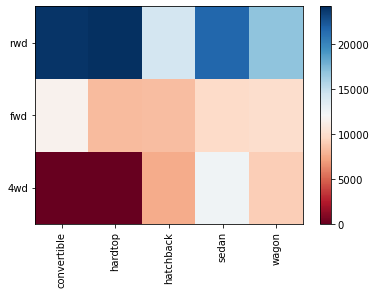

In [83]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

## Correlation and Causation

In [84]:
df.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas,aspiration-std,aspiration-turbo
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008153,...,0.075810,0.279740,-0.035527,-0.029807,-0.082391,0.066171,-0.196735,0.196735,0.054615,-0.054615
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055045,...,0.217300,0.239543,-0.225016,0.181189,0.133999,0.238567,-0.101546,0.101546,0.006911,-0.006911
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158018,...,0.371178,-0.360305,-0.470606,0.577576,0.584642,0.476153,0.307237,-0.307237,-0.256889,0.256889
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.123952,...,0.579795,-0.285970,-0.665192,0.707108,0.690628,0.657373,0.211187,-0.211187,-0.230085,0.230085
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188822,...,0.615056,-0.245800,-0.633531,0.736728,0.751265,0.673363,0.244356,-0.244356,-0.305732,0.305732
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.060663,...,-0.087001,-0.309974,-0.049800,0.084301,0.135486,0.003811,0.281578,-0.281578,-0.090336,0.090336
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167438,...,0.757981,-0.279361,-0.749543,0.836921,0.834415,0.785353,0.221046,-0.221046,-0.321955,0.321955
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.205928,...,0.822668,-0.256733,-0.650546,0.783465,0.872335,0.745059,0.070779,-0.070779,-0.110040,0.110040
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,...,0.566903,-0.267392,-0.582027,0.559112,0.543155,0.554610,0.054458,-0.054458,-0.227816,0.227816
stroke,-0.008153,0.055045,0.158018,0.123952,0.188822,-0.060663,0.167438,0.205928,-0.055390,1.000000,...,0.098128,-0.063561,-0.033956,0.047089,0.082269,0.036133,0.241064,-0.241064,-0.218233,0.218233


<b>P-value</b>: 
<p>The P-value is the probability value that the correlation between these two variables is statistically significant. Normally, we choose a significance level of 0.05, which means that we are 95% confident that the correlation between the variables is significant.</p>

By convention, when the
<ul>
    <li>p-value is $<$ 0.001: we say there is strong evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.05: there is moderate evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.1: there is weak evidence that the correlation is significant.</li>
    <li>the p-value is $>$ 0.1: there is no evidence that the correlation is significant.</li>
</ul>

Wheel base vs Price

In [87]:
pearson_coef, p_value = stats.pearsonr(df['wheel-base'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.5846418222655081  with a P-value of P = 8.076488270732989e-20


<h5>Conclusion:</h5>
<p>Since the p-value is $<$ 0.001, the correlation between wheel-base and price is statistically significant, although the linear relationship isn't extremely strong (~0.585)</p>

Horsepower vs Price

In [88]:
pearson_coef, p_value = stats.pearsonr(df['horsepower'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)

The Pearson Correlation Coefficient is 0.8096068016571054  with a P-value of P =  6.273536270650504e-48


<p>Since the p-value is $<$ 0.001, the correlation between horsepower and price is statistically significant, and the linear relationship is quite strong (~0.809, close to 1)</p>

Length vs price

In [90]:
pearson_coef, p_value = stats.pearsonr(df['length'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value) 

The Pearson Correlation Coefficient is 0.6906283804483642  with a P-value of P =  8.016477466158759e-30


Since the p-value is $<$ 0.001, the correlation between length and price is statistically significant, and the linear relationship is moderately strong (~0.691)

Width vs Price

In [91]:
pearson_coef, p_value = stats.pearsonr(df['width'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value ) 

The Pearson Correlation Coefficient is 0.7512653440522673  with a P-value of P = 9.200335510481646e-38


Since the p-value is < 0.001, the correlation between width and price is statistically significant, and the linear relationship is quite strong (~0.751).

In [92]:
pearson_coef, p_value = stats.pearsonr(df['curb-weight'], df['price'])
print( "The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

pearson_coef, p_value = stats.pearsonr(df['engine-size'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

pearson_coef, p_value = stats.pearsonr(df['bore'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =  ", p_value ) 

pearson_coef, p_value = stats.pearsonr(df['city-mpg'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value) 

pearson_coef, p_value = stats.pearsonr(df['highway-mpg'], df['price'])
print( "The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value ) 

The Pearson Correlation Coefficient is 0.8344145257702846  with a P-value of P =  2.1895772388936914e-53
The Pearson Correlation Coefficient is 0.8723351674455185  with a P-value of P = 9.265491622198389e-64
The Pearson Correlation Coefficient is 0.5431553832626602  with a P-value of P =   8.049189483935489e-17
The Pearson Correlation Coefficient is -0.6865710067844677  with a P-value of P =  2.321132065567674e-29
The Pearson Correlation Coefficient is 0.8011176263981975  with a P-value of P =  3.046784581041283e-46


### Conclusion:

##### Important variables

<p>We now have a better idea of what our data looks like and which variables are important to take into account when predicting the car price. We have narrowed it down to the following variables:</p>

Continuous numerical variables:
<ul>
    <li>Length</li>
    <li>Width</li>
    <li>Curb-weight</li>
    <li>Engine-size</li>
    <li>Horsepower</li>
    <li>City-mpg</li>
    <li>Highway-mpg</li>
    <li>Wheel-base</li>
    <li>Bore</li>
</ul>
    
Categorical variables:
<ul>
    <li>Drive-wheels</li>
</ul>

<p>As we now move into building machine learning models to automate our analysis, feeding the model with variables that meaningfully affect our target variable will improve our model's prediction performance.</p>

# Model Development and Evaluation

<b>R-squared</b>

<p>R squared, also known as the coefficient of determination, is a measure to indicate how close the data is to the fitted regression line.</p>
    
<p>The value of the R-squared is the percentage of variation of the response variable (y) that is explained by a linear model.</p>



<b>Mean Squared Error (MSE)</b>

<p>The Mean Squared Error measures the average of the squares of errors, that is, the difference between actual value (y) and the estimated value (ŷ).</p>


Multiple Linear Regression

In [116]:
#importing libraries
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

In [94]:
#selecting features for Regression
features = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

In [108]:
lm = LinearRegression()
lm.fit(features,df['price'])
Yhat=lm.predict(features)
mse = mean_squared_error(df['price'], Yhat)
print('The mean square error of price and predicted value is: ', mse)
print('R-squared is: ',lm.score(features,df['price']))

The mean square error of price and predicted value is:  11826072.956532085
R-squared is:  0.811811561534475


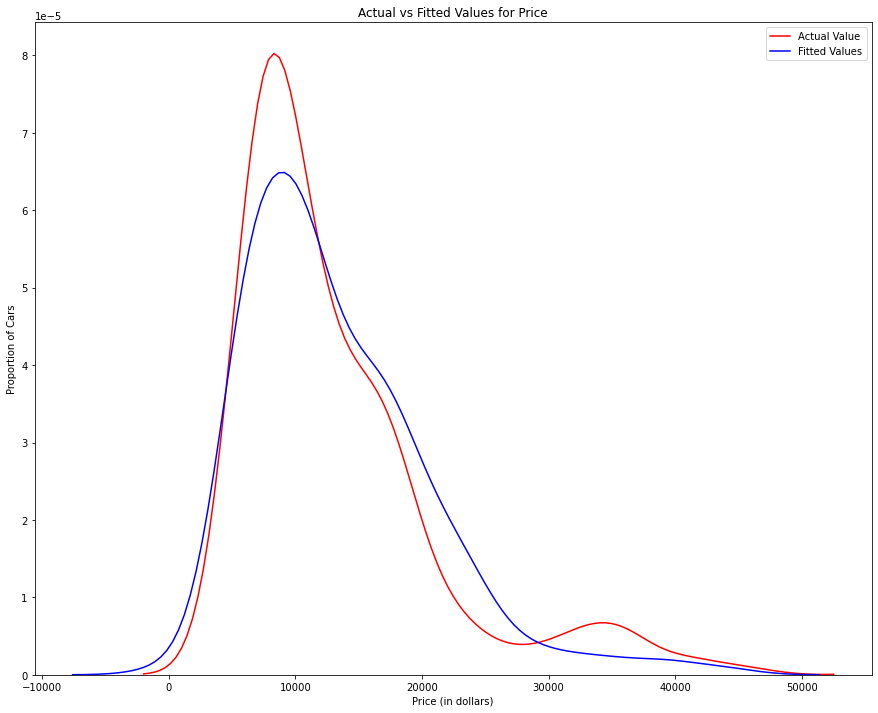

In [109]:

plt.figure(figsize=(15, 12))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Yhat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

### Pipeline

In [105]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

In [110]:
#defining pipeline
pipe=Pipeline(Input)
#fitting
pipe.fit(features,df['price'])
#predicting
ypipe = pipe.predict(features)
mse = mean_squared_error(df['price'], ypipe)
print('The mean square error of price and predicted value is: ', mse)
print('R-squared is: ',pipe.score(features,df['price']))

The mean square error of price and predicted value is:  9231051.281461732
R-squared is:  0.8531061720624729


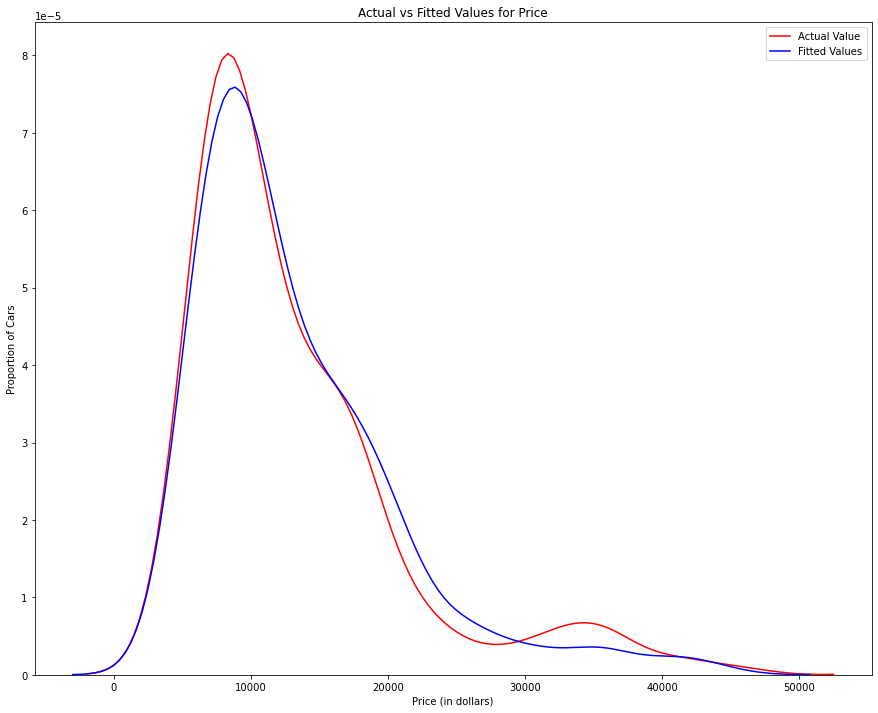

In [111]:
#plot 
plt.figure(figsize=(15, 12))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(ypipe, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

## Cross Validation

In [115]:
Rcross = cross_val_score(lm, features,df['price'], cv=4)
print("The mean of the folds are", Rcross.mean(), "and the standard deviation is" , Rcross.std())

The mean of the folds are 0.6363828116651008 and the standard deviation is 0.18498185203909231


In [119]:
Rcross = cross_val_score(pipe, features,df['price'], cv=4)
print("The mean of the folds are", Rcross.mean(), "and the standard deviation is" , Rcross.std())

The mean of the folds are 0.558731930699103 and the standard deviation is 0.1992842143015482


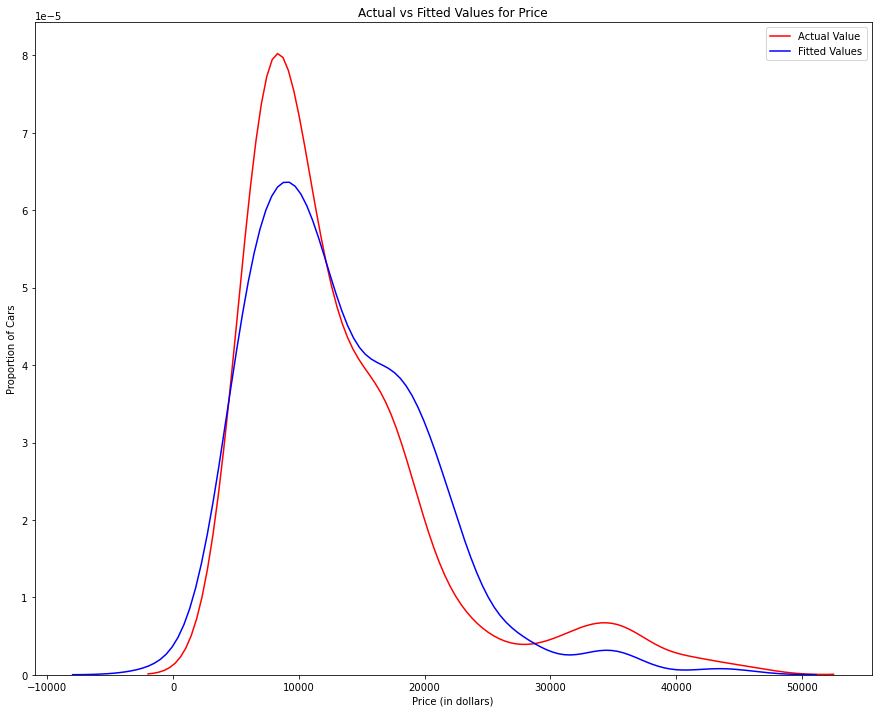

In [120]:
ycross=cross_val_predict(lm,features,df['price'],cv=4)
plt.figure(figsize=(15, 12))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(ycross, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

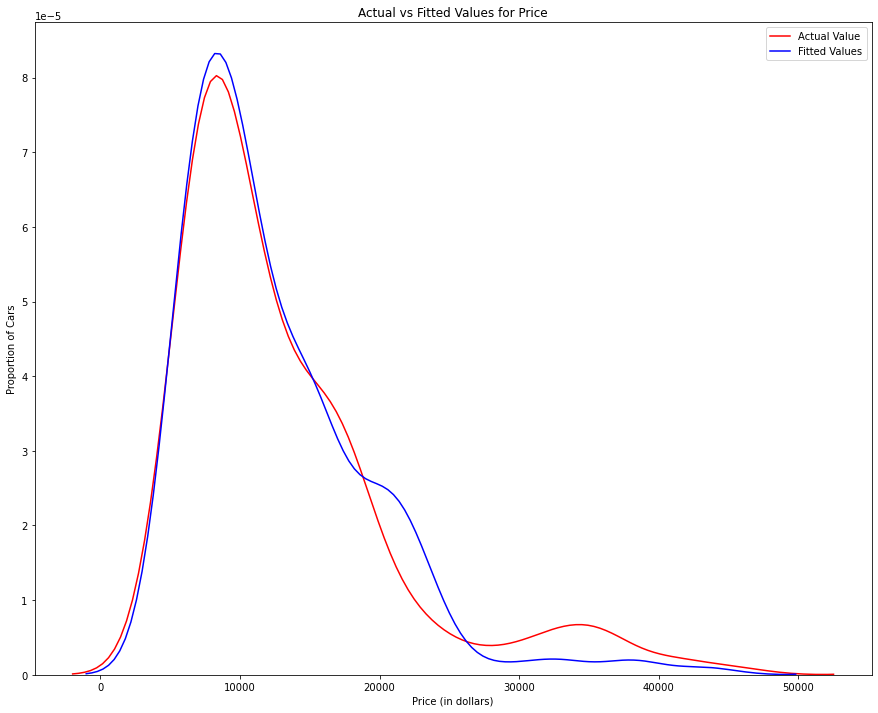

In [123]:
ypcross=cross_val_predict(pipe,features,df['price'],cv=4)
plt.figure(figsize=(15, 12))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(ypcross, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()